# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [52]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1600)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1600)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
# set up lists to hold response info
lat = []
temp_max = []
hum = []
cloud = []
wind = []
long = []
city_api = []
country = []
datetime_api = []
id_counter = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Viewing the straight Json
# weather_response = requests.get(query_url + city)
# weather_json = weather_response.json()
# city_id = weather_json["id"]
# city_name = weather_json["name"]

    # Loop through the list of cities and perform a request for data on each
for i, city in enumerate(cities):
        weather_response = requests.get(query_url + city)
        weather_json = weather_response.json()
        #Error handling
        try:
            
            city_id = weather_json["id"]
            city_name = weather_json["name"]
        
        # Add a one second interval between queries to stay within API query limits
            time.sleep(1)
    
            response = requests.get(query_url + city).json()
            lat.append(response['coord']['lat'])
            long.append(response['coord']['lon'])
            temp_max.append(response['main']['temp_max'])
            hum.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            wind.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            city_api.append(response["name"])
            datetime_api.append(response["dt"])
            
            #print(f"Retrieving information for City: {city_name} and City ID is: {city_id} ")
            print("Retrieving information for City #%d, City Name: %s" % 
             (i, city))
        except (KeyError, IndexError):
            print(f"Missing information for City: {city_name}. Skipping city.")
        
#print(f"The latitude information received is: {lat}")
#print(f"The latitude information received is: {long}")
#print(f"The temperature information received is: {temp_max}")
#print(f"The humidity information received is: {hum}")
#print(f"The cloudyiness information received is: {cloud}")
#print(f"The wind information received is: {wind}")
#print(f"The city information received is: {city_api}")
#weather_json


Missing information for City: Raudeberg. Skipping city.
Retrieving information for City #1, City Name: ushuaia
Retrieving information for City #2, City Name: barrow
Retrieving information for City #3, City Name: thompson
Retrieving information for City #4, City Name: lebu
Retrieving information for City #5, City Name: krasnystaw
Missing information for City: Krasnystaw. Skipping city.
Missing information for City: Krasnystaw. Skipping city.
Retrieving information for City #8, City Name: lhokseumawe
Retrieving information for City #9, City Name: coihaique
Retrieving information for City #10, City Name: hilo
Retrieving information for City #11, City Name: rikitea
Retrieving information for City #12, City Name: cape town
Retrieving information for City #13, City Name: cairns
Retrieving information for City #14, City Name: bethel
Retrieving information for City #15, City Name: dauphin
Retrieving information for City #16, City Name: castro
Retrieving information for City #17, City Name: gal

Retrieving information for City #143, City Name: omsukchan
Retrieving information for City #144, City Name: sirsilla
Retrieving information for City #145, City Name: husavik
Missing information for City: Husavik. Skipping city.
Missing information for City: Husavik. Skipping city.
Retrieving information for City #148, City Name: qaanaaq
Retrieving information for City #149, City Name: alofi
Retrieving information for City #150, City Name: maragogi
Retrieving information for City #151, City Name: yar-sale
Retrieving information for City #152, City Name: port macquarie
Retrieving information for City #153, City Name: college
Retrieving information for City #154, City Name: boende
Retrieving information for City #155, City Name: ontario
Retrieving information for City #156, City Name: moron
Retrieving information for City #157, City Name: cidreira
Retrieving information for City #158, City Name: jorochito
Retrieving information for City #159, City Name: alice springs
Missing information f

Retrieving information for City #286, City Name: kandrian
Retrieving information for City #287, City Name: punto fijo
Retrieving information for City #288, City Name: noumea
Retrieving information for City #289, City Name: sungairaya
Retrieving information for City #290, City Name: kudahuvadhoo
Retrieving information for City #291, City Name: zhangjiakou
Retrieving information for City #292, City Name: bilma
Retrieving information for City #293, City Name: atambua
Retrieving information for City #294, City Name: lexington
Retrieving information for City #295, City Name: salinas
Missing information for City: Salinas. Skipping city.
Retrieving information for City #297, City Name: ongandjera
Retrieving information for City #298, City Name: singkang
Retrieving information for City #299, City Name: norman wells
Retrieving information for City #300, City Name: kahului
Missing information for City: Kahului. Skipping city.
Retrieving information for City #302, City Name: peniche
Retrieving in

Retrieving information for City #426, City Name: airai
Retrieving information for City #427, City Name: alugan
Retrieving information for City #428, City Name: henderson
Retrieving information for City #429, City Name: the valley
Retrieving information for City #430, City Name: riyadh
Retrieving information for City #431, City Name: guerrero negro
Retrieving information for City #432, City Name: fort abbas
Retrieving information for City #433, City Name: kawai
Retrieving information for City #434, City Name: rumonge
Retrieving information for City #435, City Name: baghdad
Retrieving information for City #436, City Name: senno
Retrieving information for City #437, City Name: huarmey
Retrieving information for City #438, City Name: banjarmasin
Retrieving information for City #439, City Name: grand gaube
Missing information for City: Grand Gaube. Skipping city.
Missing information for City: Grand Gaube. Skipping city.
Retrieving information for City #442, City Name: bara
Retrieving inform

Retrieving information for City #567, City Name: katangli
Retrieving information for City #568, City Name: ahuimanu
Retrieving information for City #569, City Name: vila
Retrieving information for City #570, City Name: tallahassee
Retrieving information for City #571, City Name: podgornoye
Retrieving information for City #572, City Name: kaspiyskiy
Retrieving information for City #573, City Name: kodinsk
Retrieving information for City #574, City Name: alice town
Missing information for City: Alice Town. Skipping city.
Retrieving information for City #576, City Name: berdigestyakh
Retrieving information for City #577, City Name: hattiesburg
Retrieving information for City #578, City Name: adeje
Missing information for City: Adeje. Skipping city.
Retrieving information for City #580, City Name: osa
Retrieving information for City #581, City Name: tautira
Retrieving information for City #582, City Name: le port
Retrieving information for City #583, City Name: falun
Retrieving information

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
weather_dict = {
    "Longitude": long,
    "Latitude": lat,
    "City": city_api,
    "Country": country,
    "Temp Max": temp_max,
    "Humidity": hum,
    "Cloudiness (%)": cloud,
    "Wind Speed (MPH)": wind,
    "Time": datetime_api, 
    }
weather_data = pd.DataFrame(weather_dict)
weather_data.head()    

,Longitude,Latitude,City,Country,Temp Max,Humidity,Cloudiness (%),Wind Speed (MPH),Time
0,-68.31,-54.81,Ushuaia,AR,41.00,60,40,27.51,1571002486
1,-60.23,-38.31,Barrow,AR,51.12,41,38,15.37,1571002488
2,-97.86,55.74,Thompson,CA,33.80,100,90,8.05,1571002489
3,38.73,8.96,Lebu,ET,55.40,82,20,4.70,1571002489
4,23.16,50.98,Krasnystaw,PL,59.00,82,0,12.75,1571002491


In [55]:
weather_data.to_csv("output_data/Weather_Data_export.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

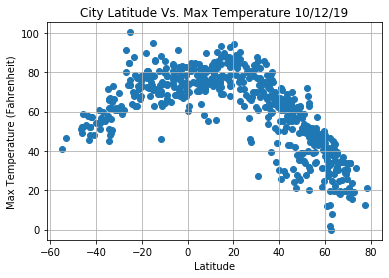

In [56]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Temp Max"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature 10/12/19")
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeVsTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

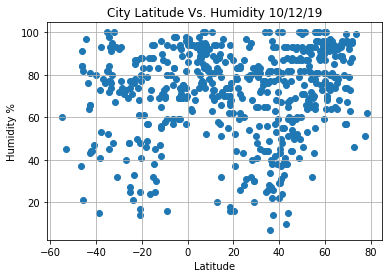

In [57]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity 10/12/19")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

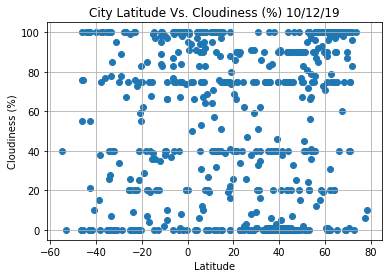

In [58]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%) 10/12/19")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

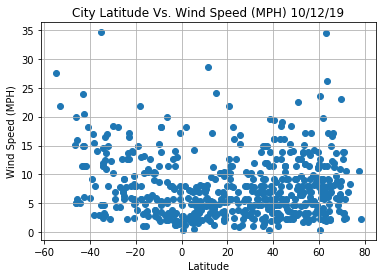

In [59]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (MPH)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (MPH) 10/12/19")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatitudeVsWindSpeed.png")

# Show plot
plt.show()

## Analysis

**Point one:** for the plot "City Latitude Vs. Max Temperature" it is fairly clear that the cities latitude will affect the temperature that it has. You can see this by the updside down U that the temperatures make from -60 to 80 degrees. 

**Point two** For the plot "City Latitude Vs. Cloudiness (%)" 